### GRADIENTE DESCENDENTE

In [6]:
#Importacion de librerias
from numpy import asarray
from numpy import arange
from numpy.random import rand
from matplotlib import pyplot
import numpy as np

In [7]:
#Definimos la funcion objetivo
def objetive(x,y):
    return (x**2.0 + y - 11.0)**2.0 + (x + y**2.0 - 7)**2.0
def derivative(x,y):
    dx=2*(x**2.0 + y - 11.0)*2.0*x + 2.0*(x + y**2.0 - 7.0)
    dy=2*(x**2.0 + y - 11.0) + 2.0*(x + y**2.0 - 7.0)*2.0*y
    return np.array([dx, dy])

In [8]:
#Algoritmo de gradiente descendente
def gradient_descent(objective, derivative, bounds, n_iter, step_size, my_flag, bounds_2):
	# Guardamos las soluciones en una lista
	solutions, scores = list(), list()
	# Generamos el punto inicial de forma aleatoria
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0]) 
	solution_2 = bounds_2[:, 0] + rand(len(bounds_2)) * (bounds_2[:, 1] - bounds_2[:, 0]) 

	# Algoritmo iterativo
	for i in range(n_iter):
		#1. Calculo del gradiente
		grad_x, grad_y = derivative(solution, solution_2)
		solution = solution - step_size * grad_x
		solution_2 = solution_2 - step_size * grad_y

		print("gradiente",grad_x, grad_y)
		#2. Actualizacion de la solucion
		#3. Evaluacion de la solucion
		solution_eval = objective(solution,solution_2)
		#Almacenamos la solucion
		solutions.append([solution, solution_2])
		scores.append(solution_eval)
		#Mostramos el progresos
		if my_flag:
			print('>%d f(x=%s, y=%s) = %.5f' % (i, solution, solution_2, solution_eval))

	return [solutions, scores]

In [9]:
# Deliminatos el rango de los datos
bounds = asarray([[-5.0, 5.0]])
bounds_2 = asarray([[-5.0, 5.0]])

# Definimos el numero de iteraciones
n_iter = 30
# Seleccionamos la longitud del paso
step_size = 0.01
# Aplicamos el algoritmo de gradiente descendente
solutions, scores = gradient_descent(objetive, derivative, bounds, n_iter, step_size, True,bounds_2)

gradiente [60.96094457] [14.98479952]
>0 f(x=[-2.29669545], y=[-2.2708709]) = 81.07527
gradiente [65.17838511] [21.61205442]
>1 f(x=[-2.9484793], y=[-2.48699144]) = 37.14010
gradiente [49.0069792] [27.85078315]
>2 f(x=[-3.4385491], y=[-2.76549927]) = 11.55814
gradiente [21.12786466] [26.98543964]
>3 f(x=[-3.64982774], y=[-3.03535367]) = 2.57336
gradiente [7.55261854] [16.01238396]
>4 f(x=[-3.72535393], y=[-3.19547751]) = 0.36511
gradiente [3.69840693] [5.93901659]
>5 f(x=[-3.762338], y=[-3.25486767]) = 0.03822
gradiente [1.16377757] [1.9901811]
>6 f(x=[-3.77397577], y=[-3.27476948]) = 0.00350
gradiente [0.38148106] [0.58937517]
>7 f(x=[-3.77779058], y=[-3.28066324]) = 0.00031
gradiente [0.10534067] [0.17943265]
>8 f(x=[-3.77884399], y=[-3.28245756]) = 0.00003
gradiente [0.03362474] [0.05108152]
>9 f(x=[-3.77918024], y=[-3.28296838]) = 0.00000
gradiente [0.00896817] [0.01552638]
>10 f(x=[-3.77926992], y=[-3.28312364]) = 0.00000
gradiente [0.00292799] [0.00436185]
>11 f(x=[-3.7792992], y

C:\Users\Sofia\AppData\Local\Temp\ipykernel_12244\2638337542.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>%d f(x=%s, y=%s) = %.5f' % (i, solution, solution_2, solution_eval))


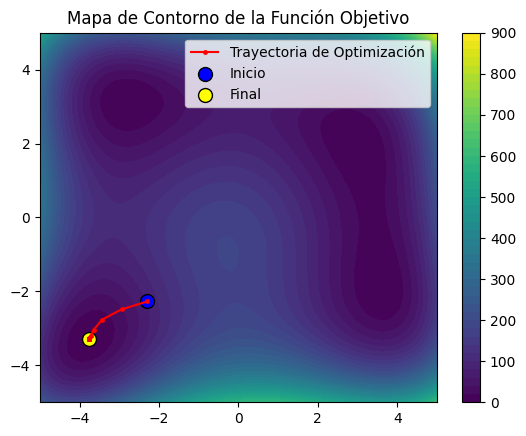

In [10]:
import matplotlib.pyplot as plt
#Grafica de la solucion
#Calculamos la funcion y=f(x,y)
x = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
y = arange(bounds_2[0,0], bounds_2[0,1]+0.1, 0.1)
X, Y = np.meshgrid(x, y)
Z = objetive(X,Y)
plt.contourf(x,y,Z,levels=50)
plt.title("Mapa de Contorno de la Función Objetivo")
plt.colorbar()

solutions = np.array(solutions)  
scores = np.array(scores)
solution_x = solutions[:, 0] #x
solution_y = solutions[:, 1]#y

plt.plot(solution_x, solution_y, '.-', color='red', markersize=5, label="Trayectoria de Optimización")
plt.scatter(solution_x[0], solution_y[0], color='blue', label="Inicio", s=100, edgecolors="black")
plt.scatter(solution_x[-1], solution_y[-1], color='yellow', label="Final", s=100, edgecolors="black")
plt.legend()
plt.show()
